In [682]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp

---
#### Wykres krzywej zespolonej

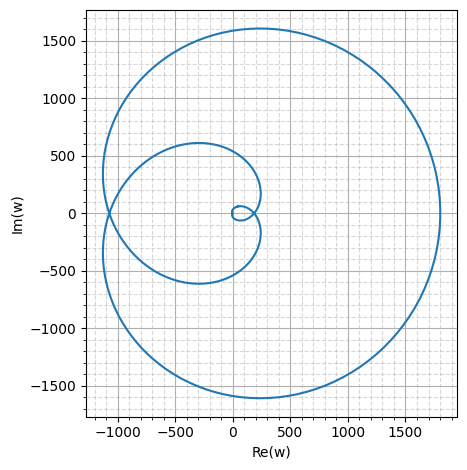

In [163]:
t = np.linspace(0,3,1000)
w1 = np.exp(1j*(np.pi/3 + 2*np.pi*t/3))
w2 = np.exp(w1) + 0.2 * w1
z = w1 * (w2 ** 7)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(np.real(z), np.imag(z))
ax.set_xlabel("Re(w)")
ax.set_ylabel("Im(w)")

ax.set_aspect("equal")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

---
#### Macierze

In [164]:
A = np.random.uniform(2, 7, (4,4))
B = np.random.uniform(1, 3, (4,4))

print(A, end='\n\n')
print(B, end='\n\n')

C = A @ B.T

print(f"cond = {np.linalg.cond(C)}", end='\n\n')
print(f"det  = {np.linalg.det(C)}", end='\n\n')
print(np.linalg.inv(C), end='\n\n')

[[6.1402465  3.7582038  4.28185    2.69035571]
 [4.54571639 4.91702326 6.29746906 2.90368291]
 [2.1173649  3.35555677 2.55920498 5.17807351]
 [3.73287111 4.7013914  5.60218532 5.85853699]]

[[1.41609256 2.10443742 2.62560502 2.10164802]
 [1.07102496 1.52067074 2.0709321  1.19783845]
 [2.67091529 1.58630113 1.55906422 1.62024949]
 [1.68747167 1.34772093 1.16646006 1.36141634]]

cond = 2695.051543186534

det  = 19.298112022297307

[[  0.68654992  -3.7966855   -4.38899328   5.90216139]
 [ -0.85916912   3.81953927   3.76190239  -5.35174498]
 [  1.11310806  -4.09139005  -5.48085204   6.53082749]
 [ -1.58720871   7.08791042   9.89689702 -11.84821133]]



---
#### ODE - numpy.integrate.solve_ivp()

success:  True
messege:  The solver successfully reached the end of the integration interval.


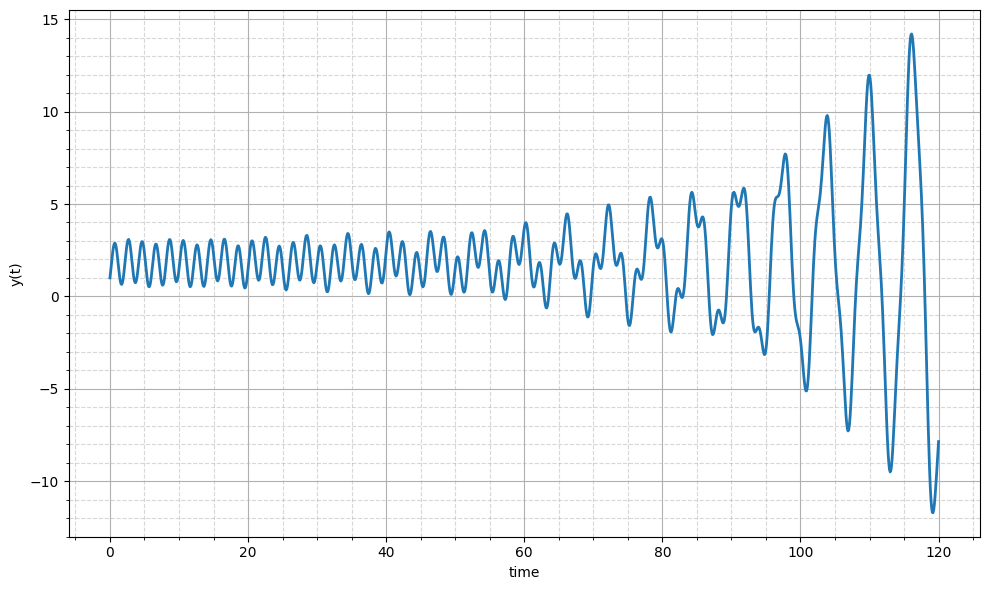

In [165]:
def fun(t,y):
    f0 = y[1]
    f1 = y[2]
    f2 = np.sin(t)*np.exp(t/25) - 10*y[1]
    return np.array([f0, f1, f2])

y0 = np.array([1,3,7])

start = 0
end = 120

sol = scipy.integrate.solve_ivp(
    fun = fun,               # funkcja Dy = f(t,y)
    t_span = [start, end],   # przedział czasu
    y0 = y0,                 # warunki początkowe
    method="RK45",
    t_eval = np.linspace(start, end, 1200)
)

print("success: ", sol.success)
print("messege: ", sol.message)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(sol.t, sol.y[0], linewidth=2)
ax.set_ylabel("y(t)")
ax.set_xlabel("time")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

---
#### Ruchy Browna 2D i 3D
$x_{k+1} = x_{k} + p_{k}$

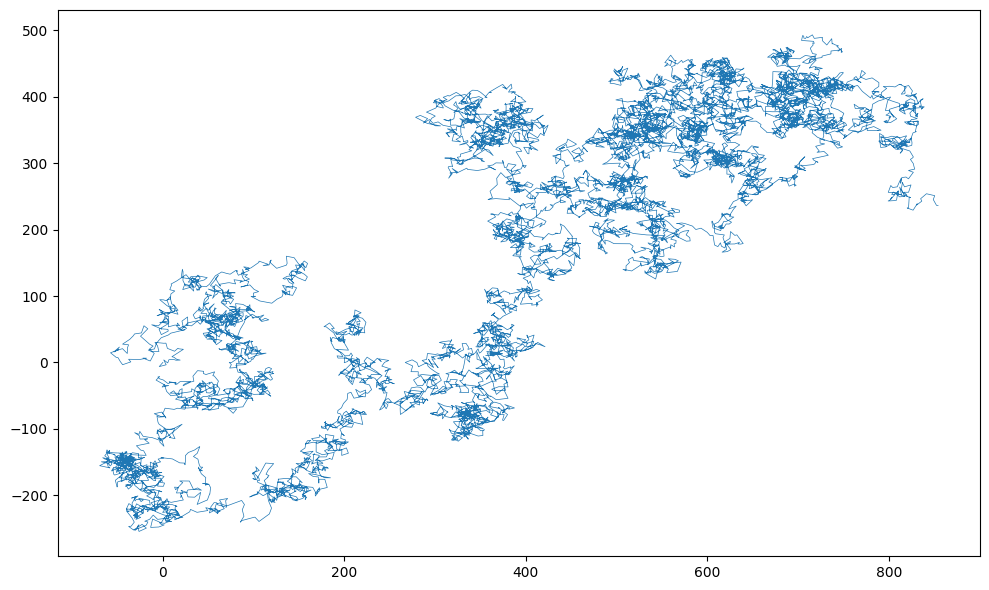

In [ ]:
n = 10_000
x0 = [0,0] # punkt startowy

x = np.zeros((n,2), dtype=np.float64)
p = np.random.normal(loc=0, scale=5, size=(n-1, 2))
x[1:] = np.cumsum(p, axis=0)
x = x + x0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(x[:,0], x[:,1], linewidth=0.5)

plt.tight_layout() # ładniej wygląda wykres

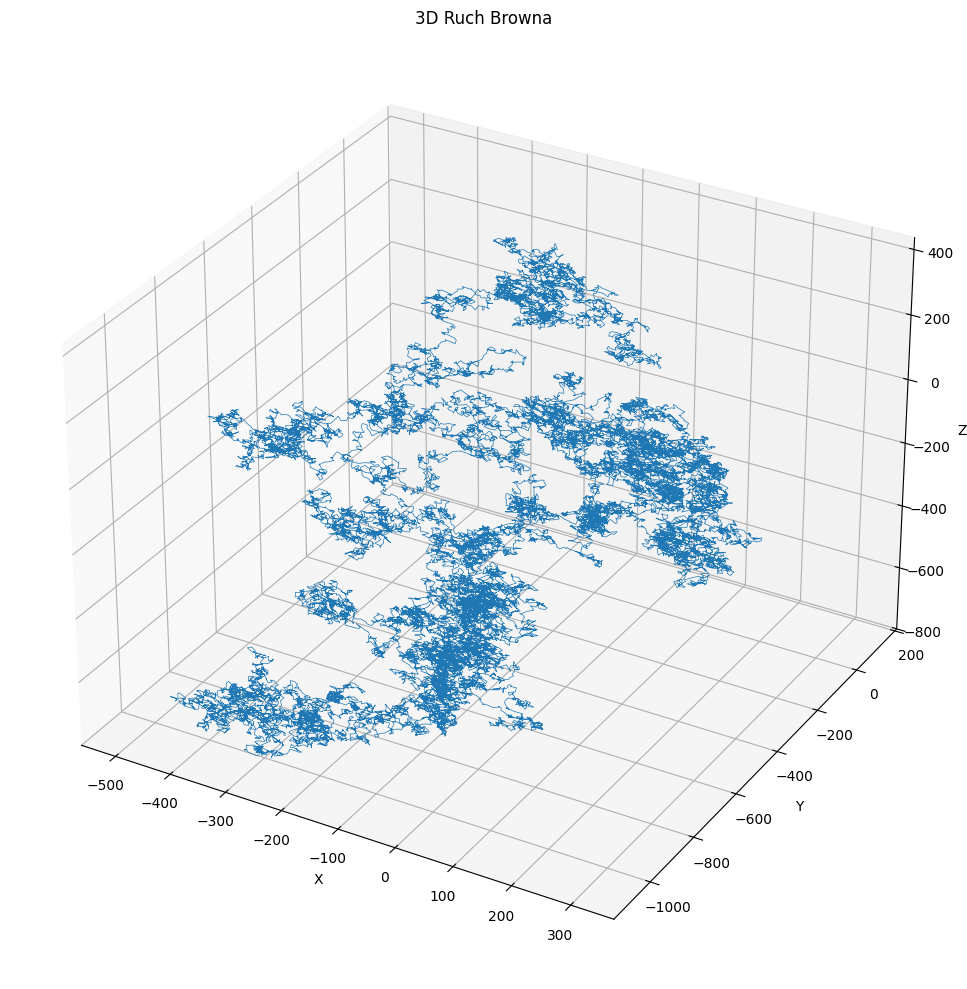

In [293]:
n = 30_000
x0 = [0,0,0] # punkt startowy

x = np.zeros((n,3), dtype=np.float64)
p = np.random.normal(loc=0, scale=5, size=(n-1, 3))
x[1:] = np.cumsum(p, axis=0)
x = x + x0

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection="3d")

ax.plot(x[:,0], x[:,1], x[:,2], linewidth=0.5)

ax.set_title("3D Ruch Browna")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()